In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


* People ranging from age 18 to 64 having Health Insurance
* Minimum BMI is 15.96 and Max BMI is 53.13
* Minimum Insurance charge is 1121 and Maximum charge is 63770

In [8]:
data = {
    'Classification': [
        'Underweight',
        'Healthy Weight (Normal Range)',
        'Overweight',
        'Obesity Class I',
        'Obesity Class II',
        'Obesity Class III (Severe Obesity)'
    ],
    'Min_BMI': [0, 18.5, 25.0, 30.0, 35.0, 40.0], # Using the numerical lower bound
    'Max_BMI': [18.4, 24.9, 29.9, 34.9, 39.9, float('inf')], # Using the numerical upper bound
    'BMI Range (kg/m^2)': [
        'Below 18.5',
        '18.5 to 24.9',
        '25.0 to 29.9',
        '30.0 to 34.9',
        '35.0 to 39.9',
        '40.0 and above'
    ],
    'Health Risk': [
        'Increased risk of other clinical problems',
        'Lowest risk (generally)',
        'Increased risk',
        'High risk',
        'Very high risk',
        'Extremely high risk'
    ]
}

df_bmi = pd.DataFrame(data)



In [9]:
df_bmi

,Classification,Min_BMI,Max_BMI,BMI Range (kg/m^2),Health Risk
0,Underweight,0.0,18.4,Below 18.5,Increased risk of other clinical problems
1,Healthy Weight (Normal Range),18.5,24.9,18.5 to 24.9,Lowest risk (generally)
2,Overweight,25.0,29.9,25.0 to 29.9,Increased risk
3,Obesity Class I,30.0,34.9,30.0 to 34.9,High risk
4,Obesity Class II,35.0,39.9,35.0 to 39.9,Very high risk
5,Obesity Class III (Severe Obesity),40.0,inf,40.0 and above,Extremely high risk


In [10]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.children.value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [13]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [14]:
df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

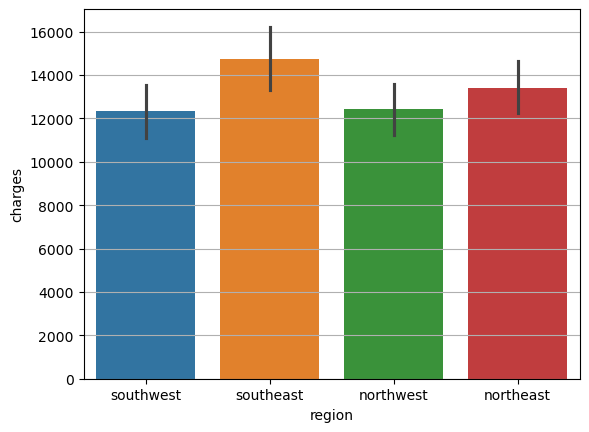

In [15]:
#Region vs Charges
sns.barplot(data=df,x='region',y='charges',hue='region')
plt.grid(axis='y')

* Healthcare costs can vary by geographic location due to differences in healthcare systems and regional health factors.

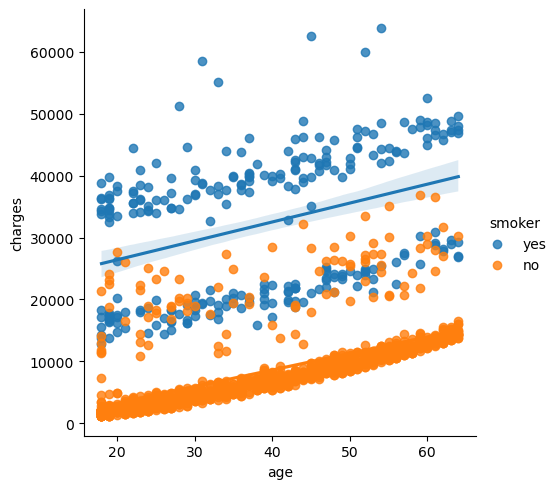

In [17]:
#Age vs Charges
sns.lmplot(data=df,x='age',y='charges',hue='smoker')

* Medical costs generally incerase with age

In [19]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols

['age', 'bmi', 'children', 'charges']

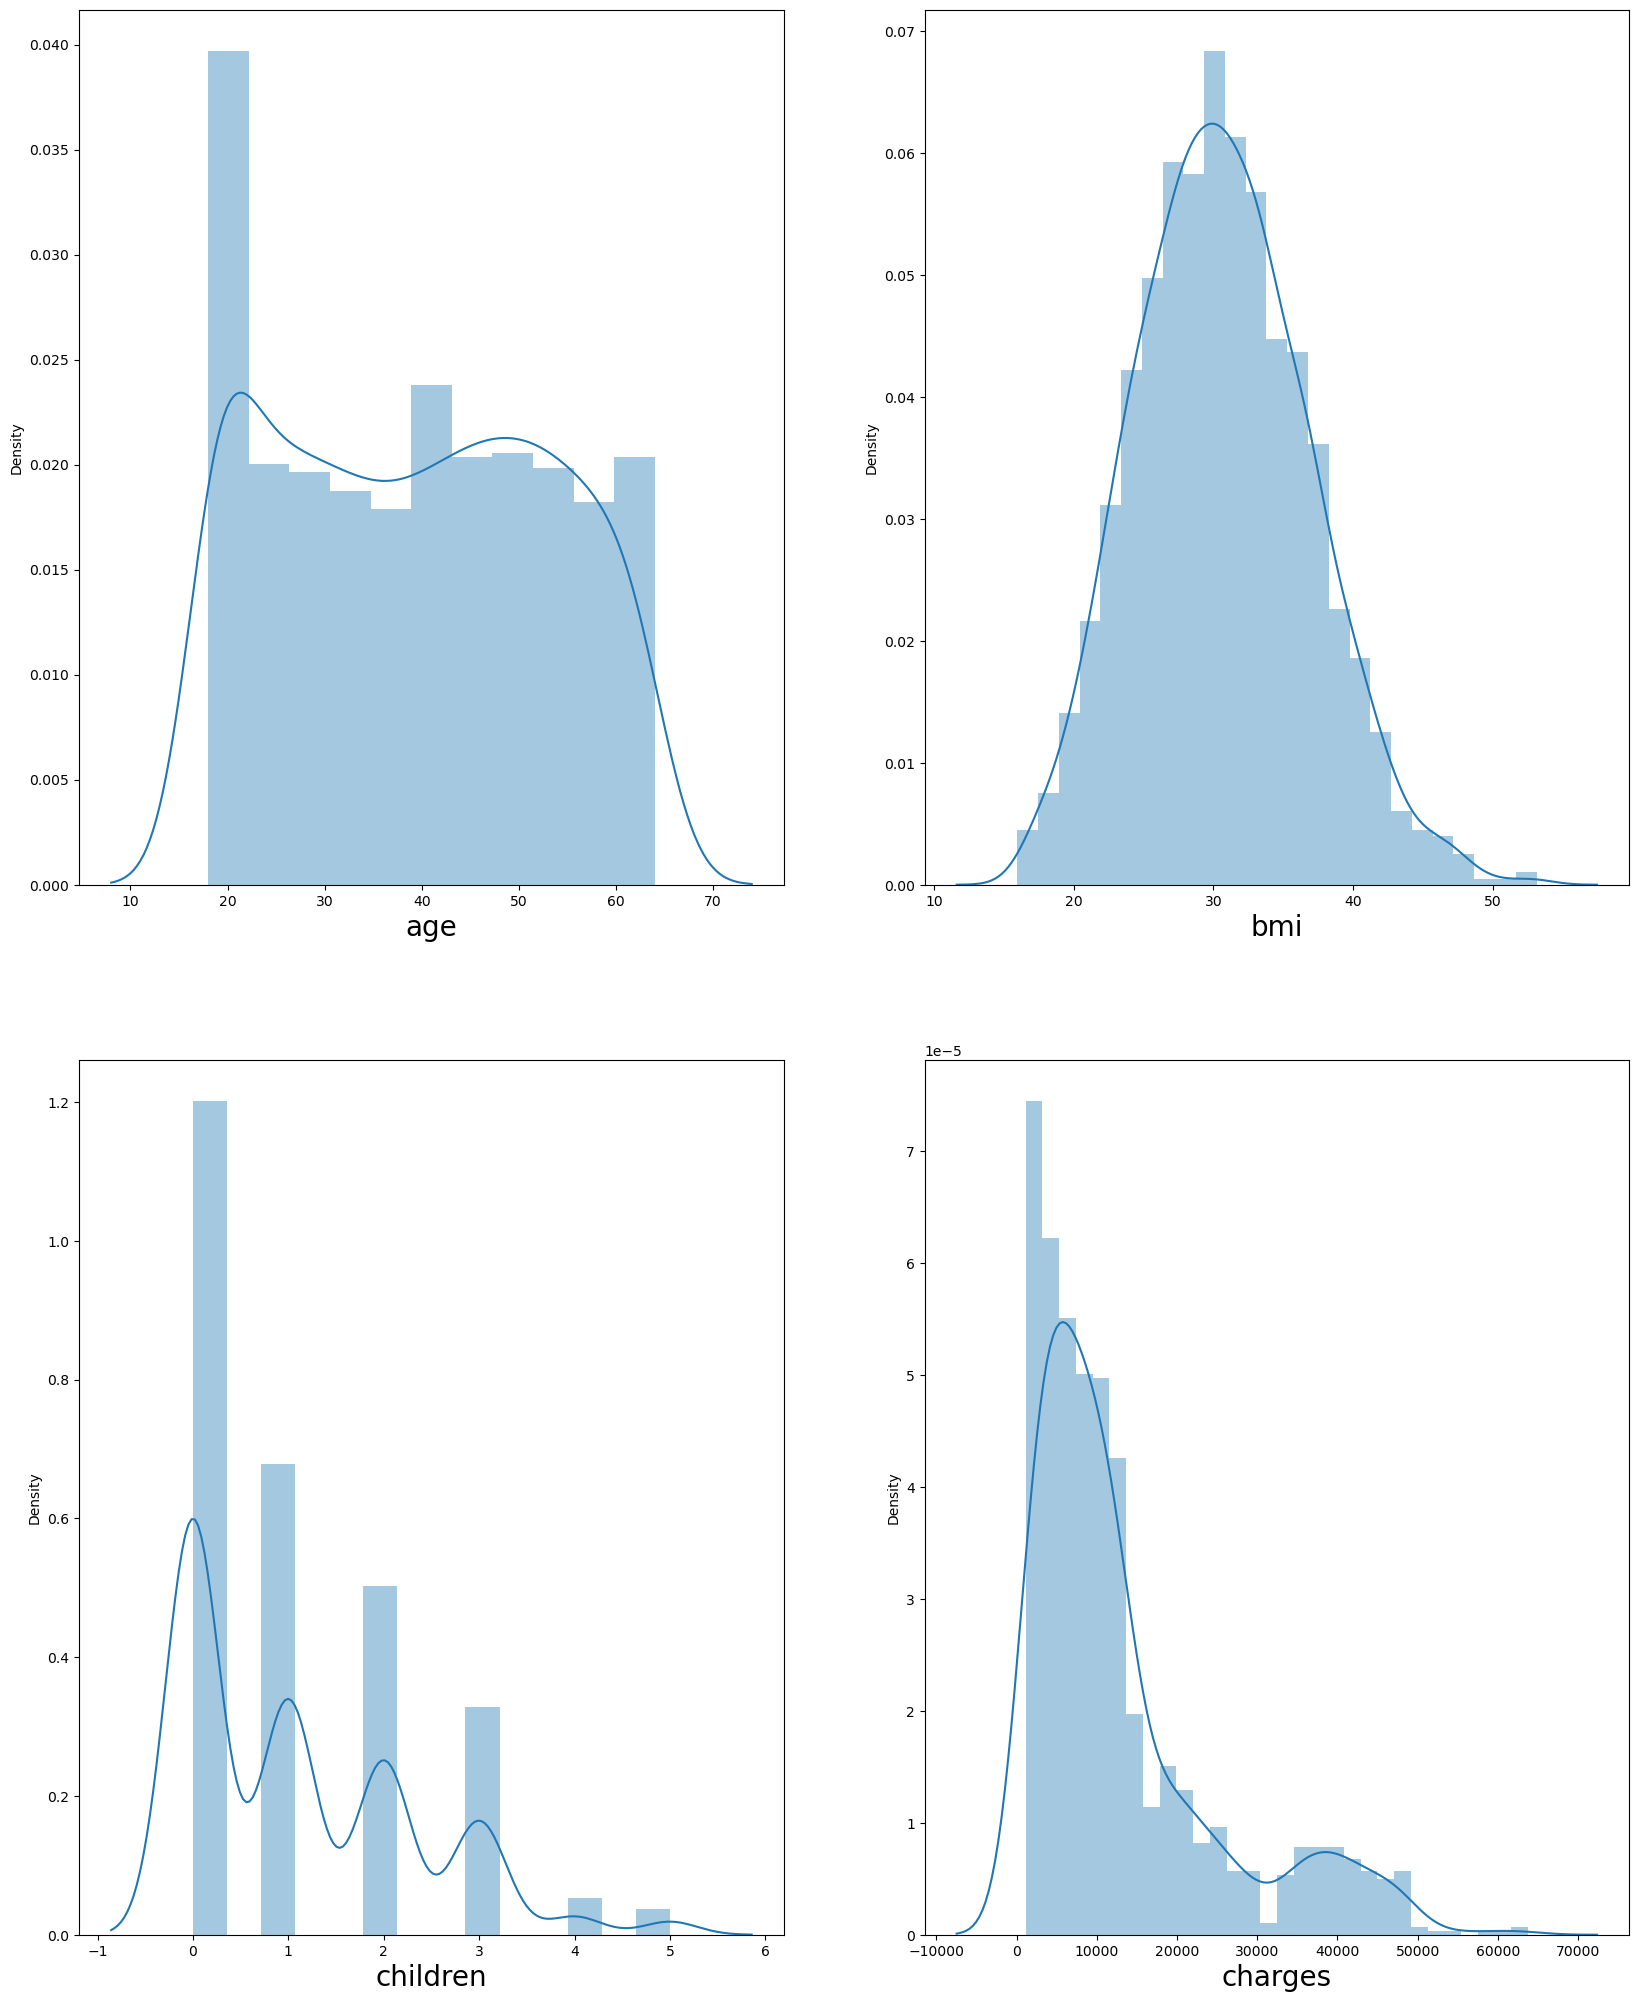

In [20]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in num_cols:
    if plotnumber<=4 :     
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
      
    plotnumber+=1
plt.show()

* BMI is Normally Distributed
* charges are slightly right-skewed

<Axes: xlabel='bmi', ylabel='charges'>

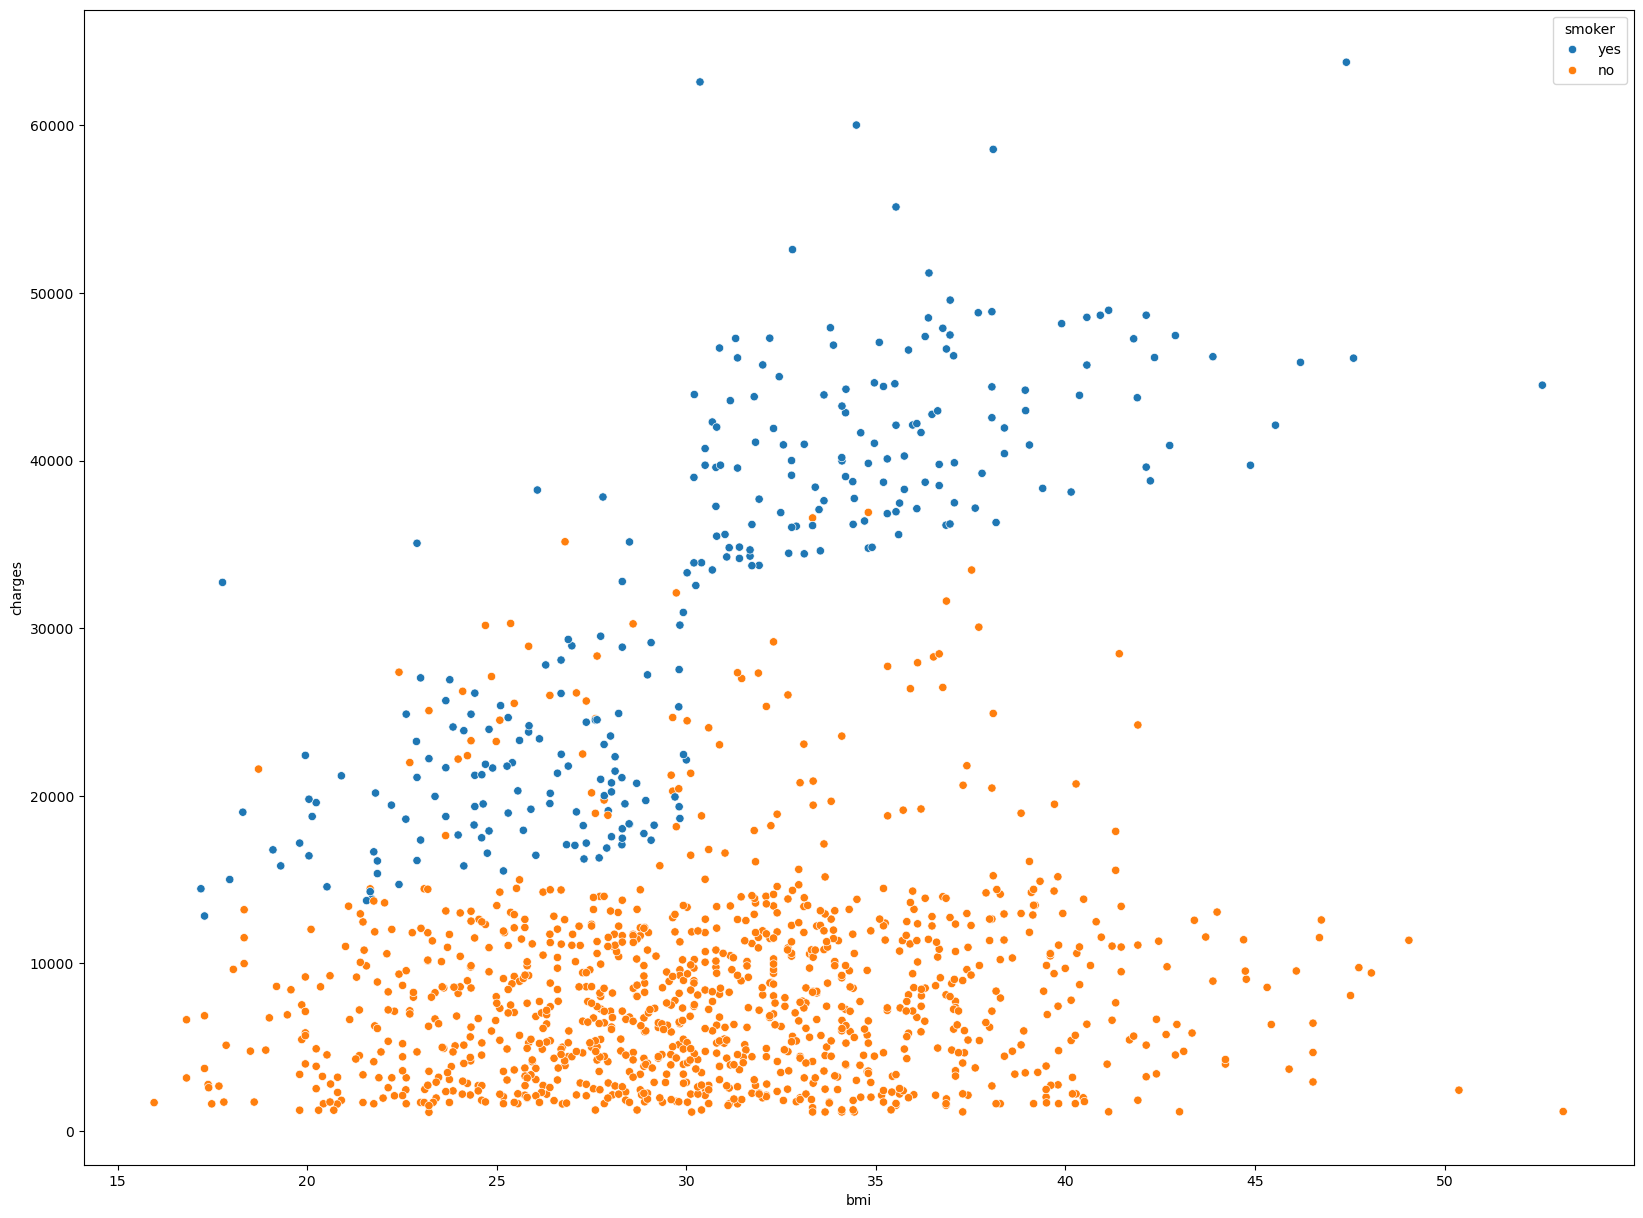

In [22]:
#BMI vs Charges
plt.figure(figsize=(20,15))
sns.scatterplot(data=df,x='bmi',y='charges',hue='smoker')

* A higher BMI can be associated with various health conditions, potentially leading to increased medical expenses.

<Axes: ylabel='bmi'>

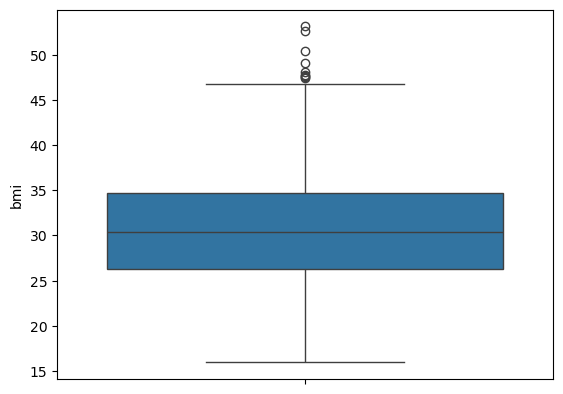

In [24]:
sns.boxplot(data=df,y='bmi')

<Axes: ylabel='charges'>

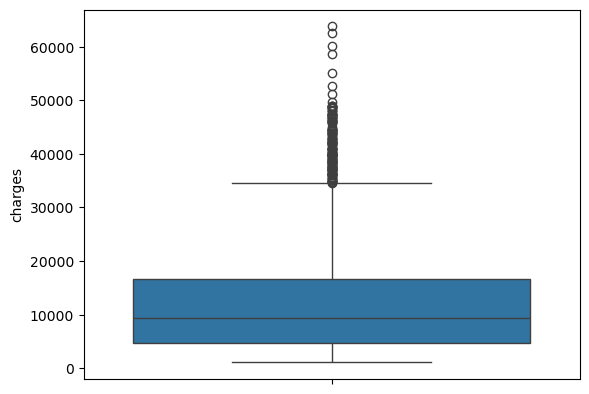

In [25]:
sns.boxplot(data=df,y='charges')

# Data Driven Recommendations

* Premium plans for tageted smokers
* Family Coverage pacakges
* Age based policy pricing

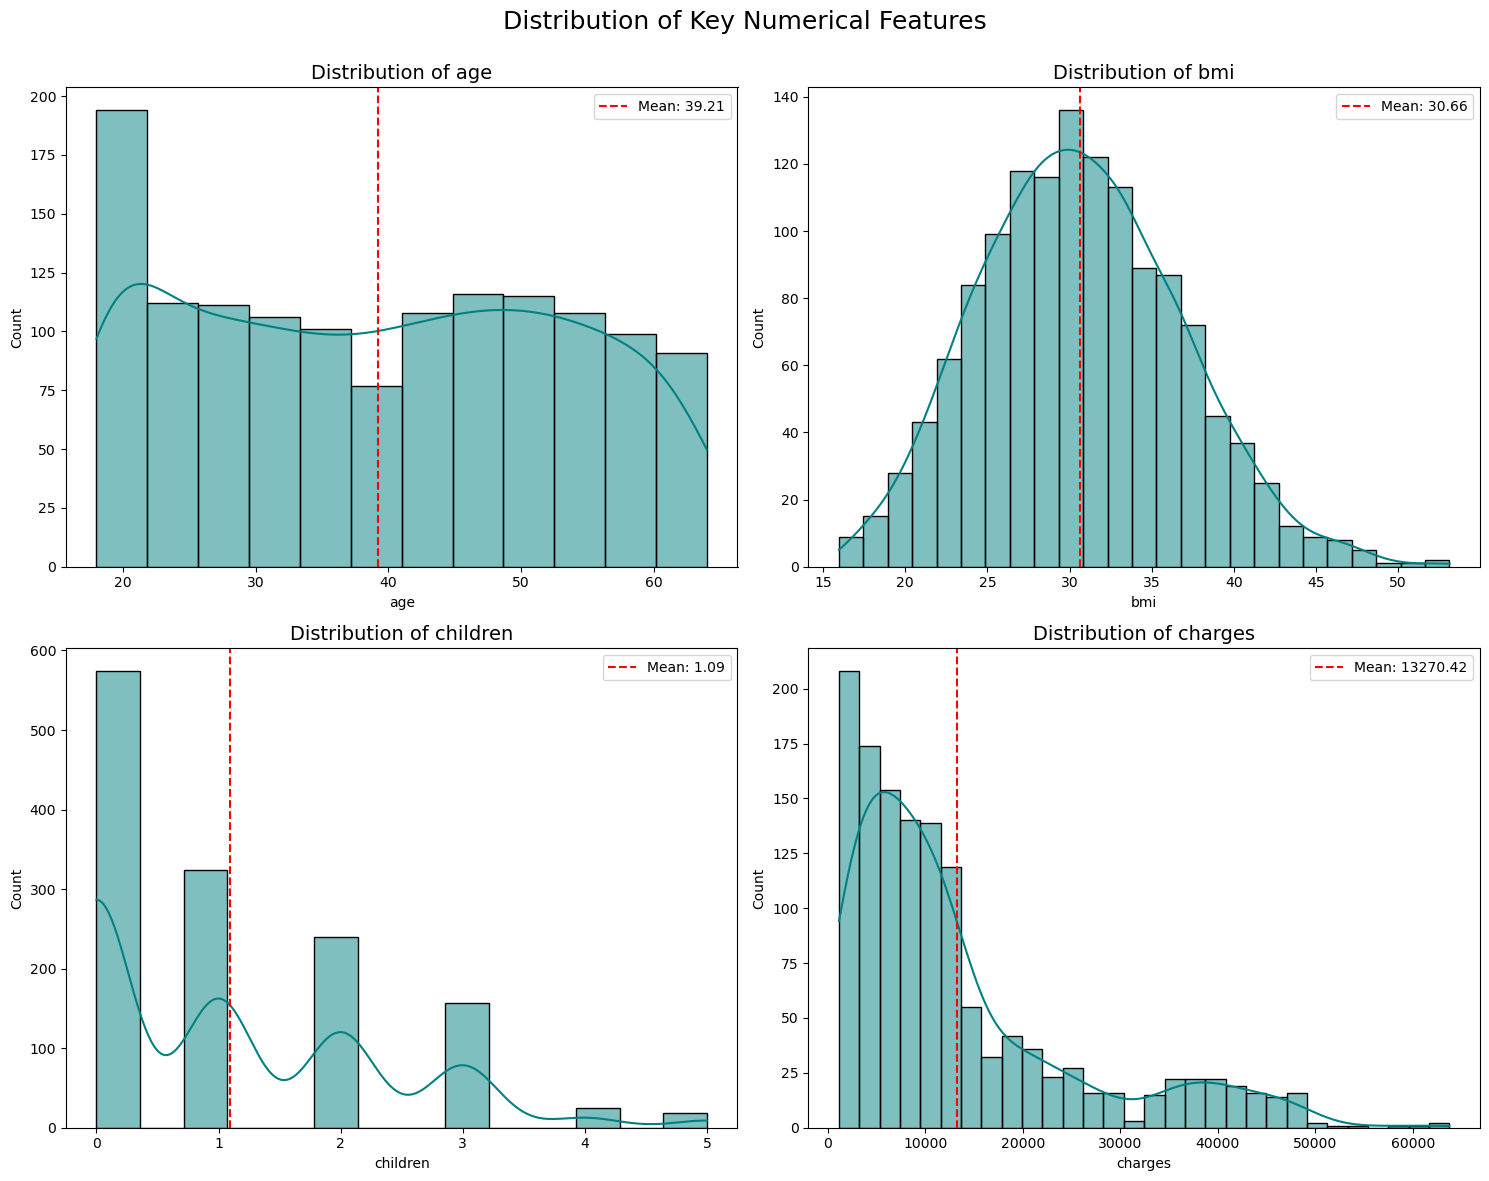

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('insurance.csv')

# Define the actual numerical columns from the dataset
num_cols = ['age', 'bmi', 'children', 'charges']

# Create a figure and a 2x2 grid of subplots (4 total slots for the 4 columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Key Numerical Features', fontsize=18)

# Loop through the numerical columns
for i, col in enumerate(num_cols):
    # Calculate row and column index for the 2x2 grid
    row = i // 2
    col_idx = i % 2

    # Set the title for the subplot
    axes[row][col_idx].set_title(f'Distribution of {col}', fontsize=14)

    # Plot the histogram (including KDE for smoother line visualization)
    sns.histplot(data=df, x=col, kde=True, ax=axes[row][col_idx], color='teal')
    
    # Add a horizontal line at the mean for easier reference
    mean_val = df[col].mean()
    axes[row][col_idx].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[row][col_idx].legend()

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig('numerical_distributions_4_plots.png')

In [29]:
cl= df.copy()

In [30]:
cl['charges'].quantile([0,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1])

0.00     1121.873900
0.05     1757.753400
0.10     2346.533615
0.25     4740.287150
0.50     9382.033000
0.75    16639.912515
0.90    34831.719700
0.95    41181.827787
0.99    48537.480726
1.00    63770.428010
Name: charges, dtype: float64